# WeatherPy
----


#### Analyis


1. Temperature correlates well with latitude because as the maximum temperature decreases, there's a direct increase in the distance away from the equator on both hemispheres.

2. There isn't correlation between humidity levels and latitude on the Northern Hemisphere since its humidity levels ranges from 10% and 100%.

3. There isn't correlation between cloudiness and latitude on both hemispheres because the cloudiness levels are scattered across all latitudes. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# Set up lists to hold response info:
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                # Ignore errors in response.
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            print('City not found. Skipping')             # Make an exception incase link is invalid
              
        count=count+1
        
# Make a notification to alert the completion of the task        
print("-"*20)
print("Data Retrieval Complete")      
print("-"*20)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 643 | rikitea
Processing Record 2 of 643 | castro
Processing Record 3 of 643 | camacha
Processing Record 4 of 643 | santa cruz
Processing Record 5 of 643 | maldonado
Processing Record 6 of 643 | chikoy
City not found. Skipping
Processing Record 7 of 643 | mataura
Processing Record 8 of 643 | orapa
Processing Record 9 of 643 | basoko
Processing Record 10 of 643 | cape town
Processing Record 11 of 643 | morant bay
Processing Record 12 of 643 | vernon
Processing Record 13 of 643 | tautira
Processing Record 14 of 643 | albany
Processing Record 15 of 643 | fairbanks
Processing Record 16 of 643 | belushya guba
City not found. Skipping
Processing Record 17 of 643 | nevers
Processing Record 18 of 643 | port alfred
Processing Record 19 of 643 | longyearbyen
Processing Record 20 of 643 | atuona
Processing Record 21 of 643 | chagda
City not found. Skipping
Processing Record 22 of 643 | tuktoyaktuk
Processing Record 23 o

Processing Record 191 of 643 | sfantu gheorghe
Processing Record 192 of 643 | cubuk
Processing Record 193 of 643 | taolanaro
City not found. Skipping
Processing Record 194 of 643 | ilhabela
Processing Record 195 of 643 | inongo
Processing Record 196 of 643 | bagdarin
Processing Record 197 of 643 | nago
Processing Record 198 of 643 | puerto montt
Processing Record 199 of 643 | genhe
Processing Record 200 of 643 | egvekinot
Processing Record 201 of 643 | corinto
Processing Record 202 of 643 | kavaratti
Processing Record 203 of 643 | rio bananal
Processing Record 204 of 643 | ciudad valles
Processing Record 205 of 643 | constitucion
Processing Record 206 of 643 | methoni
Processing Record 207 of 643 | deputatskiy
Processing Record 208 of 643 | kieta
Processing Record 209 of 643 | tuatapere
Processing Record 210 of 643 | vila franca do campo
Processing Record 211 of 643 | samarai
Processing Record 212 of 643 | mount gambier
Processing Record 213 of 643 | los llanos de aridane
Processing Re

Processing Record 387 of 643 | hagere selam
Processing Record 388 of 643 | talakan
Processing Record 389 of 643 | altay
Processing Record 390 of 643 | olafsvik
Processing Record 391 of 643 | cruzeiro do sul
Processing Record 392 of 643 | upernavik
Processing Record 393 of 643 | cururupu
Processing Record 394 of 643 | murdochville
Processing Record 395 of 643 | manta
Processing Record 396 of 643 | suraabad
Processing Record 397 of 643 | brits
Processing Record 398 of 643 | chauk
Processing Record 399 of 643 | makushino
Processing Record 400 of 643 | port augusta
Processing Record 401 of 643 | canico
Processing Record 402 of 643 | dunedin
Processing Record 403 of 643 | cockburn town
Processing Record 404 of 643 | bowen
Processing Record 405 of 643 | ratnagiri
Processing Record 406 of 643 | kaitangata
Processing Record 407 of 643 | kamaishi
Processing Record 408 of 643 | turukhansk
Processing Record 409 of 643 | novokayakent
Processing Record 410 of 643 | eyl
Processing Record 411 of 643 

Processing Record 578 of 643 | paamiut
Processing Record 579 of 643 | manono
Processing Record 580 of 643 | smithers
Processing Record 581 of 643 | port-gentil
Processing Record 582 of 643 | elblag
Processing Record 583 of 643 | macklin
Processing Record 584 of 643 | saint-pascal
City not found. Skipping
Processing Record 585 of 643 | rodrigues alves
Processing Record 586 of 643 | hobyo
Processing Record 587 of 643 | sampit
Processing Record 588 of 643 | flinders
Processing Record 589 of 643 | richards bay
Processing Record 590 of 643 | zhigansk
Processing Record 591 of 643 | kisangani
Processing Record 592 of 643 | mudon
Processing Record 593 of 643 | sechura
Processing Record 594 of 643 | vao
Processing Record 595 of 643 | huarmey
Processing Record 596 of 643 | mumford
Processing Record 597 of 643 | yarmouth
Processing Record 598 of 643 | male
Processing Record 599 of 643 | vila velha
Processing Record 600 of 643 | odienne
Processing Record 601 of 643 | cartagena
Processing Record 60

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# Create a data frame from api call list:
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness': cloud,
    'Humidity': humi,
    'Max Temp': maxtemp,
    'Wind Speed': wind
}

WeatherPy_df=pd.DataFrame(weather_dict)

# Test/clean data:
WeatherPy_df.isnull().sum()
WeatherPy_df.dropna() 
WeatherPy_df.count()

City          587
Country       587
Date          587
Lat           587
Lng           587
Cloudiness    587
Humidity      587
Max Temp      587
Wind Speed    587
dtype: int64

In [58]:
# Reset index to start at 0
WeatherPy_df = WeatherPy_df.reset_index(drop=True)


# Reorder columns
WeatherPy_df = WeatherPy_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                             "Wind Speed", "Country", "Date"]]

# Change from object to float data type
WeatherPy_df['Lat'] = WeatherPy_df['Lat'].astype(float, errors = 'raise')
WeatherPy_df['Lng'] = WeatherPy_df['Lng'].astype(float, errors = 'raise')
WeatherPy_df['Max Temp'] = WeatherPy_df['Max Temp'].astype(float, errors = 'raise')
WeatherPy_df['Cloudiness'] = WeatherPy_df['Cloudiness'].astype(float, errors = 'raise')
WeatherPy_df['Wind Speed'] = WeatherPy_df['Wind Speed'].astype(float, errors = 'raise')
WeatherPy_df['Date'] = WeatherPy_df['Date'].astype(float, errors = 'raise')

# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)


# Display the city weather data frame
WeatherPy_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.05,74,5.0,18.10,PF,1.649623e+09
1,Castro,-24.7911,-50.0119,67.80,72,34.0,3.91,BR,1.649623e+09
2,Camacha,33.0833,-16.3333,60.22,77,40.0,14.97,PT,1.649623e+09
3,Santa Cruz de la Sierra,-17.8000,-63.1667,87.85,58,40.0,23.02,BO,1.649623e+09
4,Departamento de Maldonado,-34.6667,-54.9167,78.22,64,7.0,16.08,UY,1.649623e+09


In [28]:
WeatherPy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,19.891503,16.119879,58.740085,71.568995,58.441227,8.596048,1.649623e+09
std,33.521790,90.072137,24.304838,23.129475,38.910125,5.822949,7.979197e+01
min,-54.800000,-179.166700,-18.800000,6.000000,0.000000,0.000000,1.649623e+09
25%,-8.284850,-63.200000,42.090000,61.000000,20.000000,4.180000,1.649623e+09
50%,22.890900,19.408800,64.670000,78.000000,69.000000,7.400000,1.649623e+09
75%,49.079150,93.038350,77.925000,88.000000,100.000000,11.490000,1.649623e+09
max,78.218600,179.316700,99.570000,100.000000,100.000000,32.610000,1.649624e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
This section is skipped because there aren't any cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

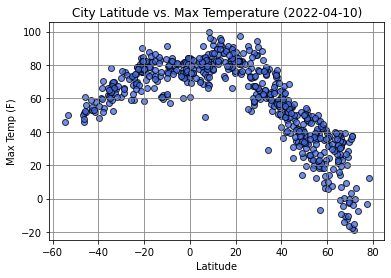

In [43]:
import datetime as dt

#Latitude Vs Temperature 

# Build Scatter Plot
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Max Temp'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


plt.title('City Latitude vs. Max Temperature' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp.png')

# Show plot
plt.show()

This plot shows the maximum temperature for different cities depending on their distance from the equator towards North and South. There is a strong correlation between the temperature and latitude on both hemispheres.

## Latitude vs. Humidity Plot

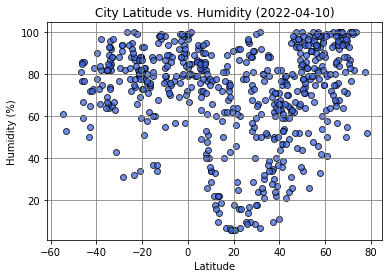

In [44]:
#Humidity Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Humidity'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Humidity' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity.png')

# Show plot
plt.show()

This plot shows that there are high levels of humidity next to the equator.

## Latitude vs. Cloudiness Plot

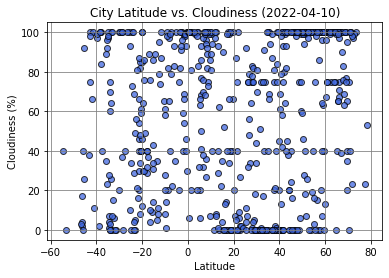

In [45]:
#Cloudiness Vs. Latitude 
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Cloudiness'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Cloudiness' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

This plot shows that there isn't correlation between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

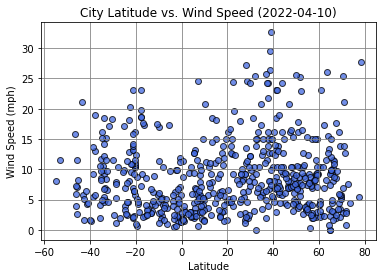

In [56]:
#Wind Speed Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Wind Speed'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Wind Speed' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind Speed.png')

# Show plot
plt.show()

This plot shows that there is little to no correlation between wind speed and latitude on both hemispheres.

## Linear Regression

In [47]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
weather_data_north = WeatherPy_df[WeatherPy_df['Lat'] >= 0]

#weather_data_north.count()

# Create new data frame for southern hemisphere (lat < 0 degree):
weather_data_south = WeatherPy_df[WeatherPy_df['Lat'] < 0]

#weather_data_south.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8757021738741531


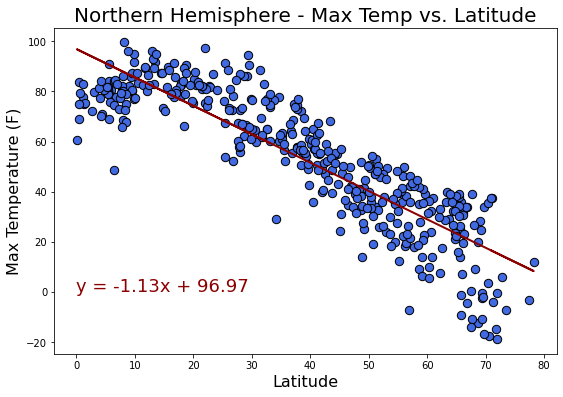

In [48]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

There is a strong correlation between the latitude and maximum temperature on the Northern Hemisphere. As latitude increases, maximum temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7078059868223583


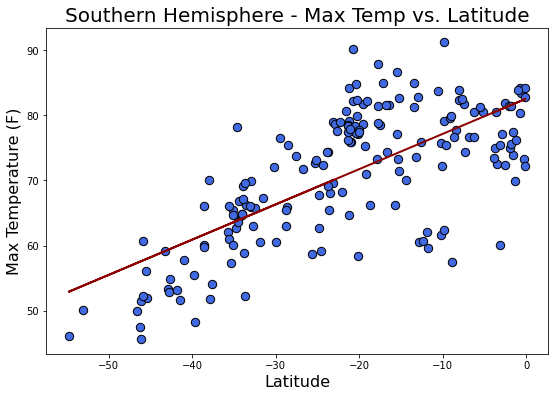

In [49]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 40),fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. As the latitude increases/ gets closer to the equator, the maximum temperature increases. The Southern Hemisphere's maximum temperature variance is greater than the Northern Hemisphere's and there's a broader maximum temperature variation for different cities positioned on the same latitude on the Southern Hemisphere too.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3159234090482149


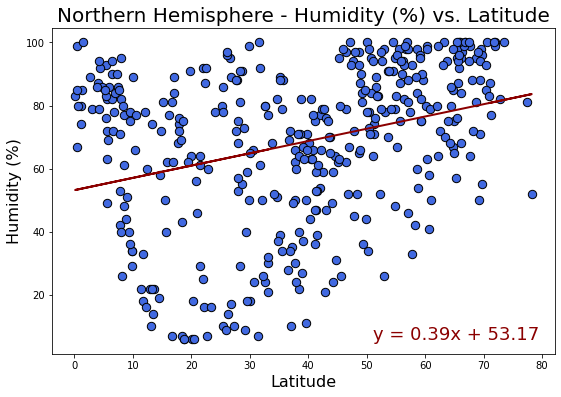

In [50]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

There is almost no correlation between the humidity level and latitude for the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1839687360581373


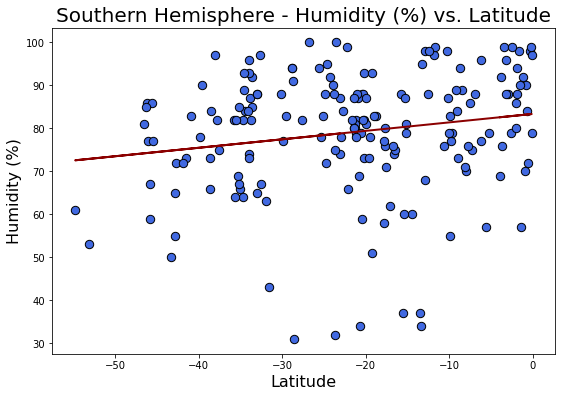

In [51]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()

There is almost no correlation between humidity levels and a city position on the Southern Hemisphere. Higher levels of humidity are observed close to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19437908129613232


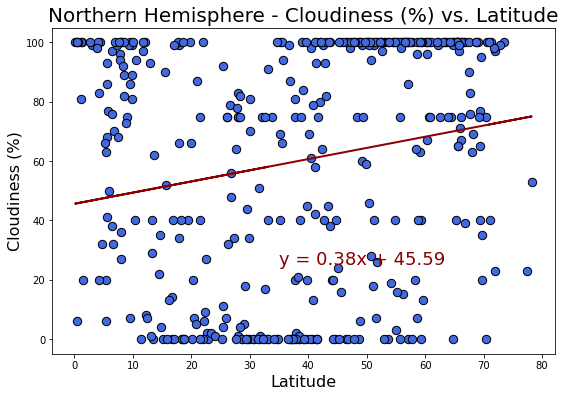

In [52]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

There isn't correlation between cloudiness and latitude on the Northern Hemisphere. Cloudiness levels are scatttered across all latitudes.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2151255766571791


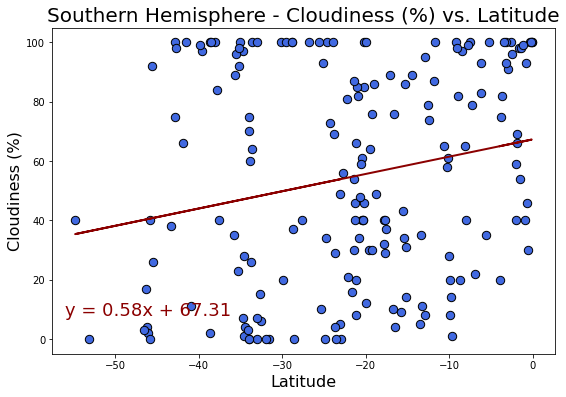

In [53]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

There isn't correlation between cloudiness and latitude on the Southern Hemisphere. Cloudiness levels ranges from 0% to 100%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07289117174425584


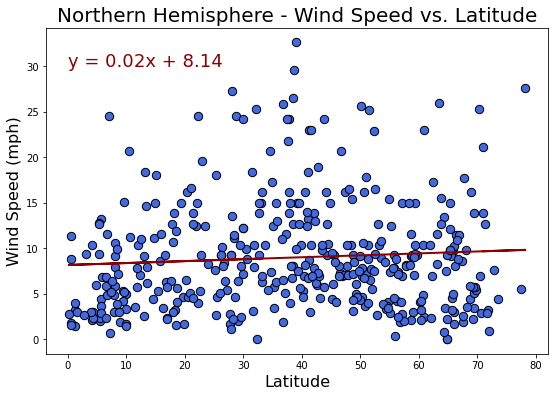

In [54]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

There is very low correlation between the wind speed and latitude on the Northern Hemisphere. The majority of cities on the Northern Hemisphere have wind speed levels ranging between 0 mph and 20 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22689597279262258


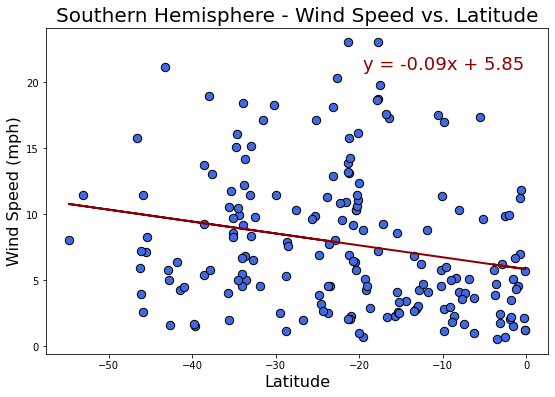

In [55]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

There is a very low negative correlation between wind speed and latitude on the Southern Hemisphere. As the latitude decreases away from the equator, the wind speed lightly increases.